In [1]:
!pip install -r requirements.txt

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-0gvh1cau/detectron2_fb6473d24c4842df94fcdbd5f98ec6d4
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-0gvh1cau/detectron2_fb6473d24c4842df94fcdbd5f98ec6d4
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 652.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

In [1]:
import cv2
import os
from double_detection import *
from utils import initialize_model
from bounding_box import BoundingBox, BoundingBoxes
from google.colab.patches import cv2_imshow

In [2]:
model = initialize_model()

config.yaml?dl=1: 8.19kB [00:01, 6.65kB/s]
model_final.pth?dl=1: 482MB [00:08, 54.3MB/s]                           
/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:240: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on 

In [3]:
image_path = "/content/RED LED Fab Drawing_page-0001.jpg"
image = cv2.imread(image_path)

In [4]:
# Set detection parameters
score_thresh = 0.2
space_margin = 10

# Get all detected tables as BoundingBoxes object
bounding_boxes = get_all_tables(model, image, score_thresh, space_margin)

# Print the bounding boxes
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    print(f"BoundingBox {i+1}: {box}")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


BoundingBox 1: BoundingBox(x1=678.0, y1=971.043306350708, x2=2083.0, y2=1204.0, score=0.4240959882736206)
BoundingBox 2: BoundingBox(x1=156.0783920288086, y1=234.6944351196289, x2=2557.718017578125, y2=650.2418212890625, score=0.9854529500007629)
BoundingBox 3: BoundingBox(x1=3112.7603454589844, y1=3558.326904296875, x2=5314.966796875, y2=3934.8603515625, score=0.39902928471565247)
BoundingBox 4: BoundingBox(x1=132.40382385253906, y1=199.04885864257812, x2=2594.72265625, y2=623.2708740234375, score=0.5418705344200134)


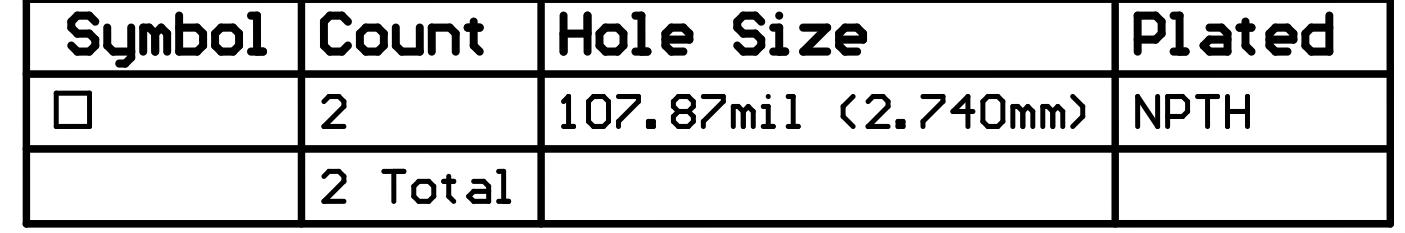

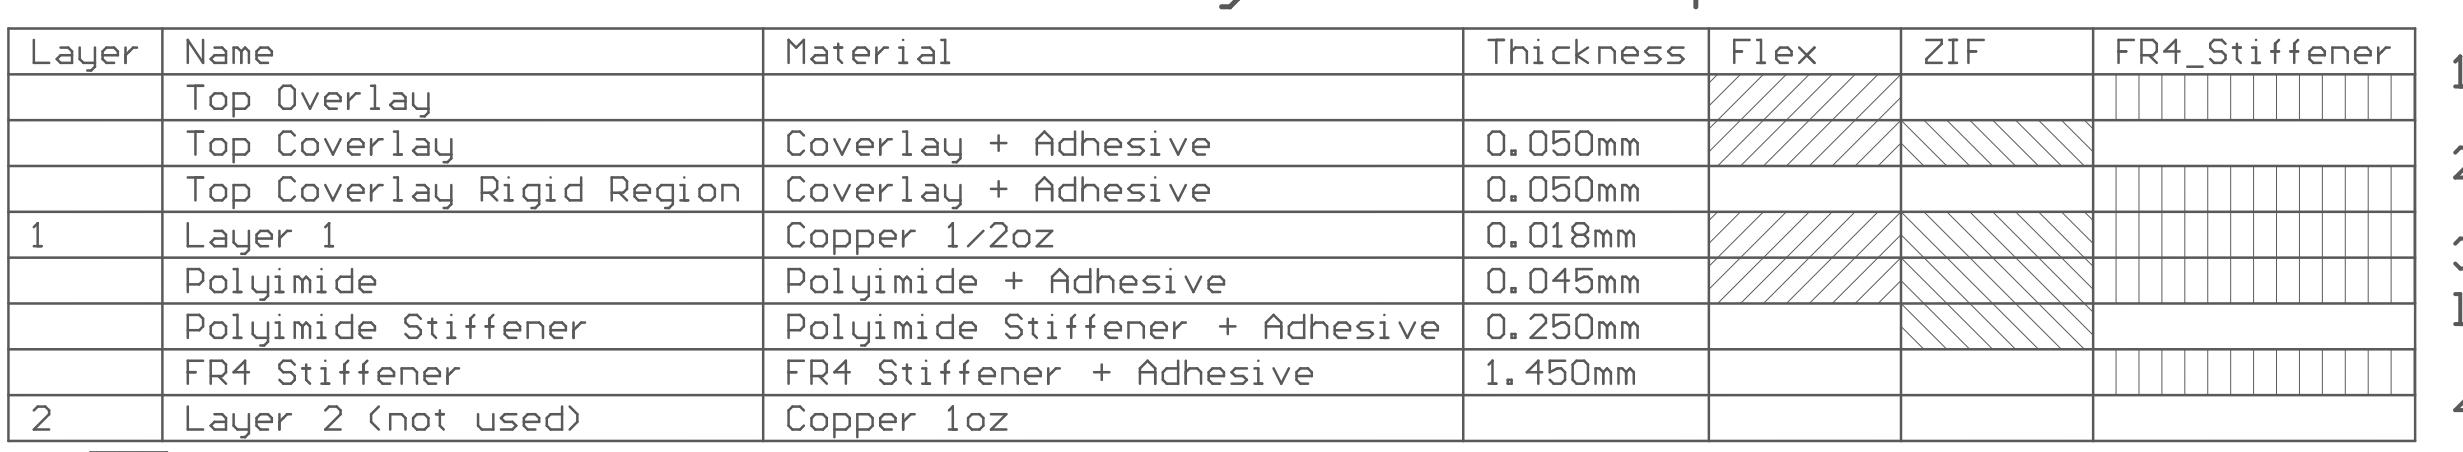

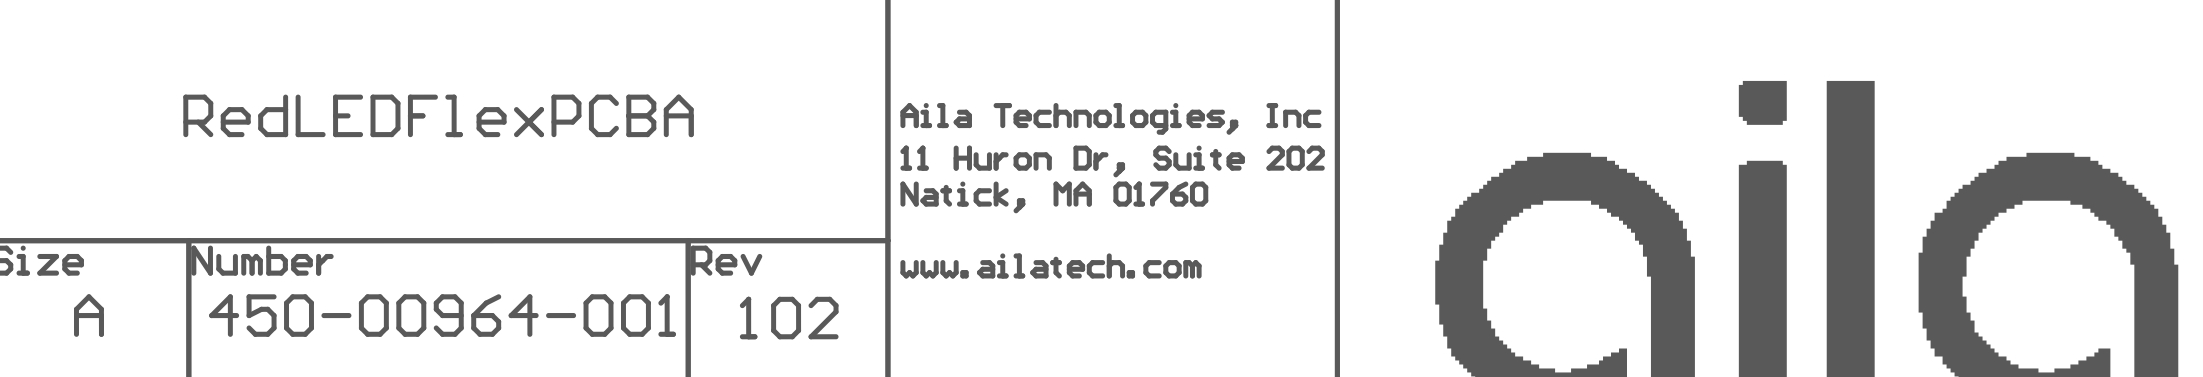

In [5]:
bounding_boxes.merge_intersection()
# Iterate through bounding boxes and display each cropped table
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    cropped_image = box.crop_image(image)
    cv2_imshow(cropped_image)

BoundingBox 1: BoundingBox(x1=1039.2766423225403, y1=66.90703773498535, x2=1601.0, y2=198.61973571777344, score=0.9746211171150208)
BoundingBox 2: BoundingBox(x1=945.7152709960938, y1=1028.2566108703613, x2=1599.0, y2=1115.7904510498047, score=0.4131263792514801)
BoundingBox 3: BoundingBox(x1=932.2518920898438, y1=1030.4733276367188, x2=1571.3280029296875, y2=1125.267578125, score=0.5347188711166382)
BoundingBox 4: BoundingBox(x1=818.4439086914062, y1=1025.3580265045166, x2=1592.1309814453125, y2=1127.1908645629883, score=0.3942110538482666)


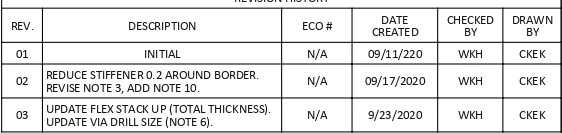

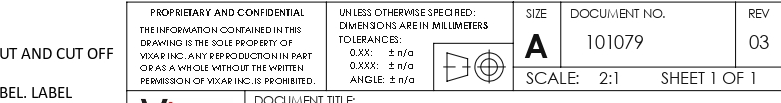

In [6]:
image_path = "/content/101079 (03) Flex(1)_page-0001.jpg"
image = cv2.imread(image_path)
# Set detection parameters
score_thresh = 0.2
space_margin = 10

# Get all detected tables as BoundingBoxes object
bounding_boxes = get_all_tables(model, image, score_thresh, space_margin)

# Print the bounding boxes
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    print(f"BoundingBox {i+1}: {box}")

bounding_boxes.merge_intersection()
# Iterate through bounding boxes and display each cropped table
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    cropped_image = box.crop_image(image)
    cv2_imshow(cropped_image)


BoundingBox 1: BoundingBox(x1=1568.0, y1=59.74324131011963, x2=1982.7647094726562, y2=526.0497436523438, score=0.9492373466491699)
BoundingBox 2: BoundingBox(x1=1267.0, y1=1455.4407043457031, x2=2397.0, y2=1696.0, score=0.5802037119865417)


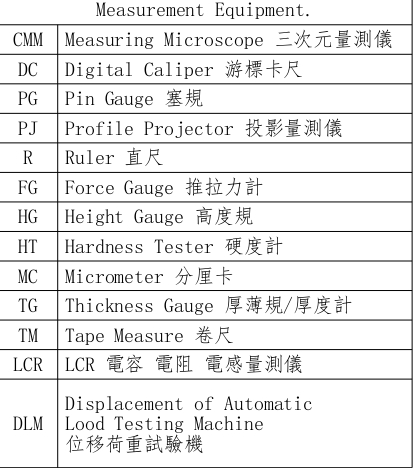

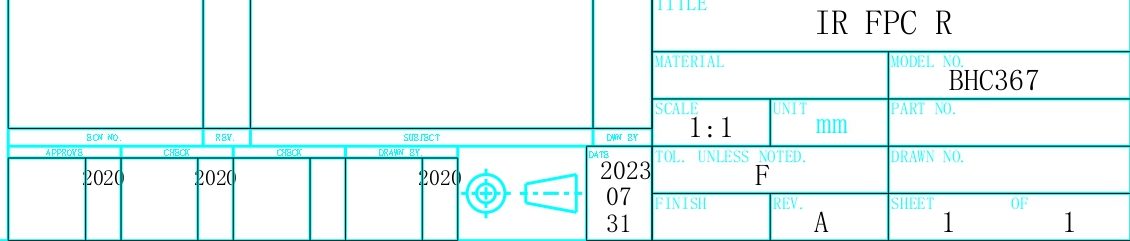

In [7]:
image_path = "/content/earbud_ir_fpc_R_0731_page-0001.jpg"
image = cv2.imread(image_path)
# Set detection parameters
score_thresh = 0.2
space_margin = 10

# Get all detected tables as BoundingBoxes object
bounding_boxes = get_all_tables(model, image, score_thresh, space_margin)

# Print the bounding boxes
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    print(f"BoundingBox {i+1}: {box}")

bounding_boxes.merge_intersection()
# Iterate through bounding boxes and display each cropped table
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    cropped_image = box.crop_image(image)
    cv2_imshow(cropped_image)


BoundingBox 1: BoundingBox(x1=2029.0, y1=2066.384433746338, x2=4550.0, y2=2786.4008178710938, score=0.9935957789421082)
BoundingBox 2: BoundingBox(x1=2043.2509765625, y1=2055.2065811157227, x2=4536.093505859375, y2=2883.6136474609375, score=0.8947991728782654)
BoundingBox 3: BoundingBox(x1=2027.2828979492188, y1=2460.0, x2=4328.7158203125, y2=2788.51318359375, score=0.6086452603340149)
BoundingBox 4: BoundingBox(x1=1995.227294921875, y1=2630.84423828125, x2=4596.873046875, y2=3228.4375610351562, score=0.6018589735031128)
BoundingBox 5: BoundingBox(x1=2089.051025390625, y1=2963.5646362304688, x2=3341.8565673828125, y2=3203.3726196289062, score=0.2491408884525299)


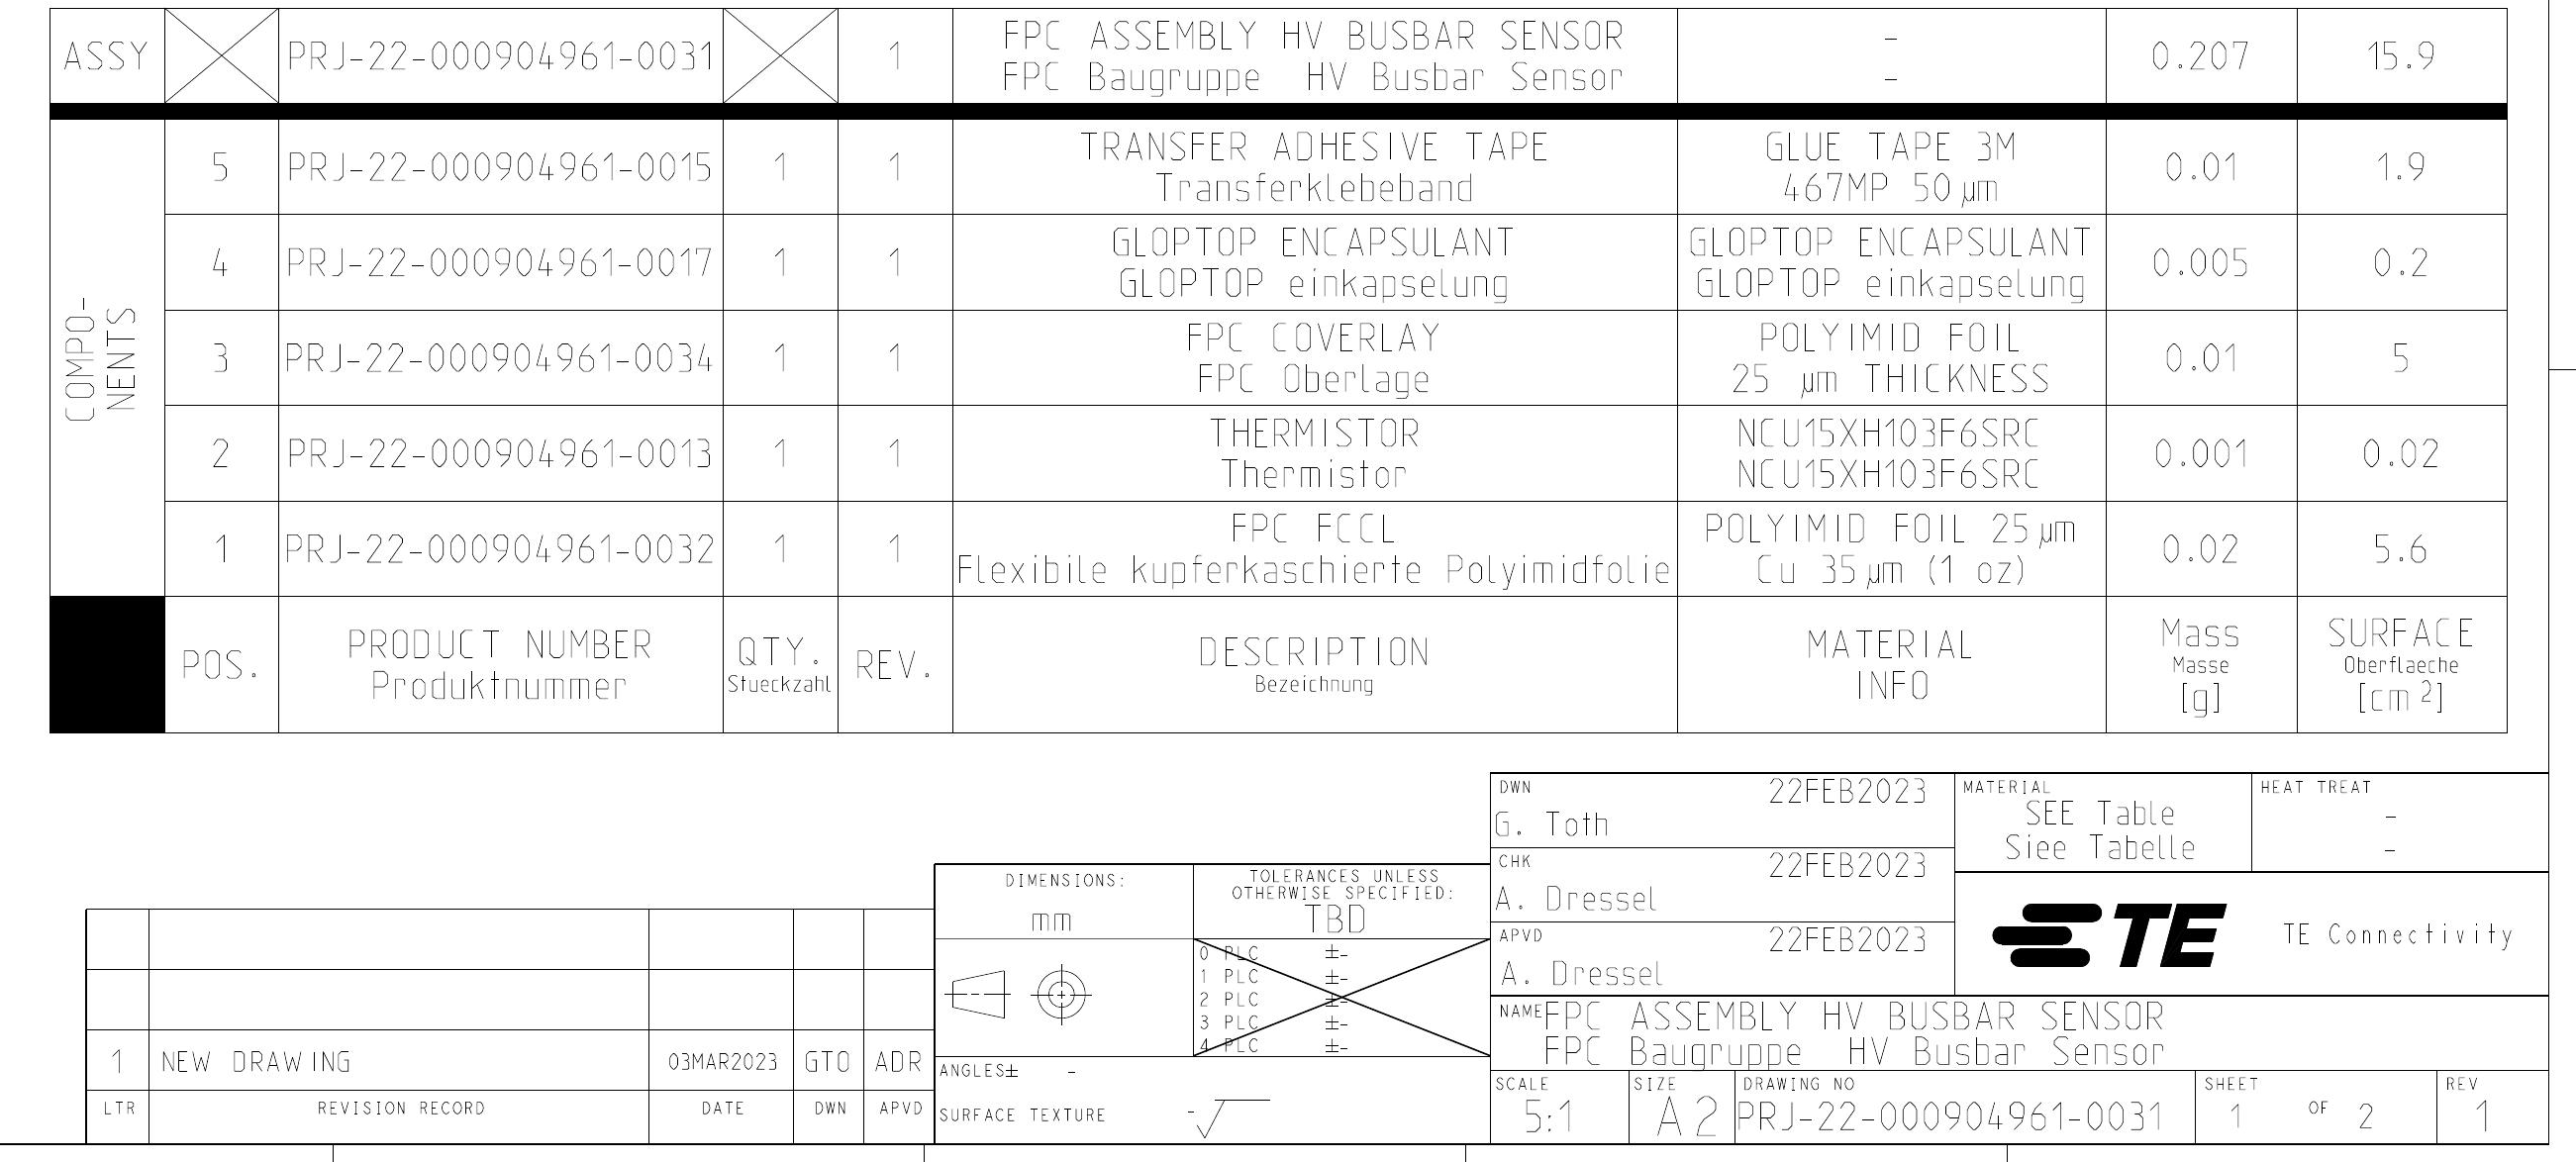

In [8]:
image_path = "/content/prj-22-000904961-0031-2023-05-23.jpg"
image = cv2.imread(image_path)
# Set detection parameters
score_thresh = 0.2
space_margin = 10

# Get all detected tables as BoundingBoxes object
bounding_boxes = get_all_tables(model, image, score_thresh, space_margin)

# Print the bounding boxes
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    print(f"BoundingBox {i+1}: {box}")

bounding_boxes.merge_intersection()
# Iterate through bounding boxes and display each cropped table
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    cropped_image = box.crop_image(image)
    cv2_imshow(cropped_image)


BoundingBox 1: BoundingBox(x1=623.9594452381134, y1=1977.2645263671875, x2=1566.943603515625, y2=2283.98388671875, score=0.8071168065071106)
BoundingBox 2: BoundingBox(x1=460.0, y1=80.0, x2=1544.0, y2=226.6636199951172, score=0.26322418451309204)
BoundingBox 3: BoundingBox(x1=249.35711812973022, y1=1995.9976997375488, x2=1574.0, y2=2234.684600830078, score=0.4661002457141876)
BoundingBox 4: BoundingBox(x1=260.9157965183258, y1=1979.8446044921875, x2=1565.9483642578125, y2=2231.3779296875, score=0.5491743683815002)


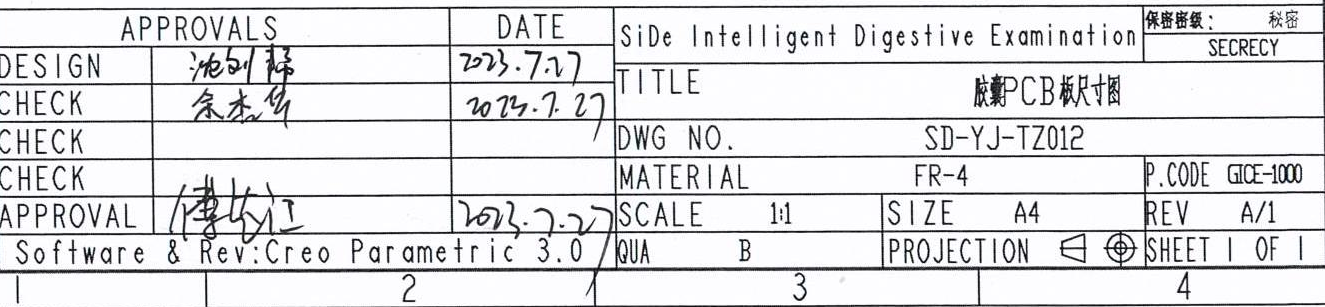

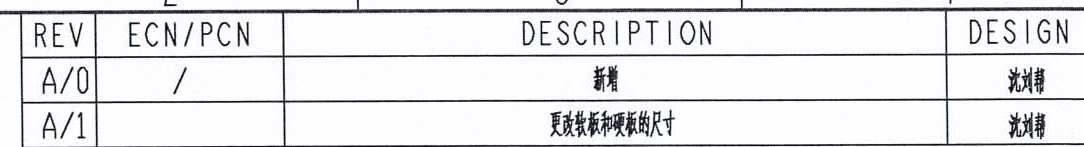

In [9]:
image_path = "/content/SD-YJ-TZ012 胶囊PCB板尺寸图（A1）.jpg"
image = cv2.imread(image_path)
# Set detection parameters
score_thresh = 0.2
space_margin = 10

# Get all detected tables as BoundingBoxes object
bounding_boxes = get_all_tables(model, image, score_thresh, space_margin)

# Print the bounding boxes
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    print(f"BoundingBox {i+1}: {box}")

bounding_boxes.merge_intersection()
# Iterate through bounding boxes and display each cropped table
for i, box in enumerate(bounding_boxes.get_all_boxes()):
    cropped_image = box.crop_image(image)
    cv2_imshow(cropped_image)
